## Lesson A

In [1]:

# fix my code!! 

def fib(x):
    if x==0:
        return 0
    if x>1:
        return fib(x-1)+fib(x-2)
    return 1

# fix my code!! 

def choose(n,k):
    if k>=1 and k<=n-1:
        return choose(n-1,k)+choose(n-1,k-1)
    return 1


#### test programs ....

def test_fib():
    answers = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
    i = 1
    for ans in answers:
        if fib(i)!=ans:
            print("broken!")
            return
        i = i + 1
    print("correct!")


def test_choose():
    answers = [[1,1],[1,2,1],[1,3,3,1],[1,4,6,4,1],[1,5,10,10,5,1]]
    n = 1
    k = 0
    for ans in answers:
        for v in ans:
            if choose(n,k)!=v:
                print("broken!")
                return
            k = k + 1
        k = 0
        n = n + 1
    print("correct!")

#### run the tests
        
test_fib()
test_choose()

correct!
correct!


## Lesson B

In [2]:
# fix my broken code

# a note about Python text. "" and '' are identical in function. Unlike some languages,
# Python does not have a character datatype. For people used to, be careful because 'a' is
# character sequence that happens to be one character long

# The triple quote """ """ is used in docstrings; if a triple quoted string is the first statement
# of a function, it is collected up for the automated documentation of that function


def count_the_vowels(s):
    """
    Given a string s, return the count of vowels in s
    """
    number_of_spaces = 0 
    for c in s:
        if c in "aeiou":
            number_of_spaces = number_of_spaces +1
    return number_of_spaces

text = "The world will little note, nor long remember what we say here, but it can never forget what they did here."

def test_count_the_vowels():
    if count_the_vowels(text)==29:
        print("correct!")
    else:
        print("broken!")

test_count_the_vowels()



correct!


In [3]:
# fix my broken code

# this also introduces the append method of a list, comparison of lists,
# "square bracket" indexing of a list, and the sort method for a list



def list_uniq(l_in):
    """
    given a list return a list of the unique values.
    do this (perhaps) using sorting (why?)
    """
    l_out = []
    l_in.sort() # mutable, the original list is rearranged
    y = l_in[0]
    l_out.append(y)
    
    for x in l_in:
            if y!=x:
                l_out.append(x)
            y = x
    return l_out    

def test_list_uniq():
    l_in = [3,2,6,4,1,5,4,4,1,3,5,6,9]
    ans = [1, 2, 3, 4, 5, 6, 9]
    if ans == list_uniq(l_in):
        print("correct!")
    else:
        print("broken!")

test_list_uniq()

correct!


## Lesson C

In [4]:
#
# in response to a question, an experiment
#
#


class C:
    def __init__(self):
        pass
    
    def c(self):
        return self.c_x()
    
    def c_x(self):
        print("c_x")
    
class D:
    def __init__(self):
        pass
    
    def d(self):
        return self.d_x()
    
    def d_x(self):
        print("d_x")
    

c = C()
d = D()

#C.c(d)
C.c(c)
c.c()

d.c_x = lambda : print("instancey c_x")

D.c_x = lambda self: print("classy c_x")
C.c(d)


d2 = D()
C.c(d2)

print("done")

print(d2.__class__.__name__)

c_x
c_x
instancey c_x
classy c_x
done
D


In [29]:
# is the class directory mutable?

class E:
    def e(self):
        print("how e is")

e = E()
e.e()

E.e = lambda self : print("how e is now")

e.e()

# yes it is

# does the instance directory cover the calls directory?

e1 = E()
e2 = E()
e1.e()
e2.e()
e1.e = lambda : print("an e just for this e")
e1.e()
e2.e()

# but e1.e is more like a static method, the syntatic sugar is not triggered
# here is how to do it

class F:
    def __init__(self,i):
        self.i = i

f = F(13)
f.f = (lambda self : (lambda j : print("a method with self",j,self.i)))(f)
f.f(15)
f.f(17)

# however this is a bit inconsistent with class methods, that will have 
# self (the class object) inserted as the first argument

F.f_class = lambda self : print("self is", self.__class__.__name__)
f.f_class()

how e is
how e is now
how e is now
how e is now
an e just for this e
how e is now
a method with self 15 13
a method with self 17 13
self is F


The idea of _namespaces_ seems a bit unclear, and I prefer directory. There are,

* the global directory
* the local directory, stacked by def's calls
* the class directory, accessed by a class selector
* the instance directory, accessed by an instance reference



In [ ]:

# fix my broken code!

# note the pass statements. they are there because Python does not allow a
# define, or a if body, etc, to be empty. something has got to go there.
# pass does nothing

class Accumulate:
    
    def __init__(self):
        self.quantity = 0
        
    def accumulate(self,x):
        self.quantity += x
        
    def tell(self):
        # tell me self.quantity
        return self.quantity


def test_accumulate():
    test_input = [4,2,7,5,2,4,1,3,2]
    test_quantity = 0
    acc = Accumulate()
    for x in test_input:
        test_quantity += x
        acc.accumulate(x)
    if acc.tell()==test_quantity:
        print("correct!")
    else:
        print("broken!")
        
test_accumulate()

In [ ]:

class Likelihood:
    def __init__(self,n):
        self.n = n

    def set_prior(self,d):
        if len(d)!=self.n:
            raise Exception("incorrect dimension")
        self.d = d[:]
        
    def set_likelihood(self,lh):
        if len(lh)!=self.n:
            raise Exception("incorrect dimension")
        self.lh = lh[:]
        
    def update_post(self):
        for i in range(self.n):
            self.d[i] = self.d[i]*self.lh[i]
        sum = 0 
        for s in self.d:
            sum += s
        for i in range(self.n):
            self.d[i] = self.d[i]/sum
        
    def tell_dist(self):
        return self.d
    
    def tell_likeliest(self):
        m = max(self.d)
        return self.d.index(m)
            
def m_and_m_problem():
    """
    From Allen Downey, Think Bayes
    1994 M&M bag: 30% brown, 20% yellow, 20% red, 10% green, 10% orange, 10% tan
    1996 M&M bag: 24% blue, 20% green, 16% orange, 14% yellow, 13% red, 13% brown
    
    a yellow is drawn from one bag, and a green from the other
    
    what is the likelihood tye yellow came from a 1994 bag?
    """
    
    n = 2  # there are two cases, 0: yellow from 1994, 1: yellow from 1996
    prior = [0.5,0.5]  # we have no idea which case we are in
    likelihood = [
        .2*.2, # if in case 0, independent prob yellow from 1994 and green from 1996
        .1*.14 # if in case 1, independent probl green from 1994 and yellow from 1996
    ]
    
    l_h = Likelihood(n)
    l_h.set_prior(prior)
    l_h.set_likelihood(likelihood)
    l_h.update_post()
    
    # note: using a tuple to return multiple values. tuples are immutable
    return (l_h.tell_dist(),l_h.tell_likeliest())

def test_m_and_m_problem():
    # the answers
    ans = [0.74, 0.25]
    ans_l = 0
    
    # tuple assignment
    (res,likeliest) = m_and_m_problem() 
    
    # shows how to loop over the indices (range(len())), 
    # and how to do list comprehension [ x for la la la ]
    # and how to use max over a list
    err = max([(ans[i]-res[i])**2 for i in range(len(ans))])
    
    if likeliest!=ans_l:
        print("broken!")
    if err<0.01:
        print("correct!")
    else:
        print("broken!")
        
test_m_and_m_problem()

## Lesson D

In [34]:
# fix my broken code

def perfect_shuffle(deck):
    deck[:] = deck[::2]+deck[1::2]
    return deck

def n_perfect_shuffle(m):
    """
    answers the question: how many perfect shuffles on
    a deck of m cards returns the deck to the original order
    """
    deck = [i for i in range(m)]
    deck_org = deck[:]
    count = 1
    perfect_shuffle(deck)
    # a while loop until deck comes back to deck_org, perhaps?
    while deck!=deck_org:
        perfect_shuffle(deck)
        count += 1
    return count
    
def test_perfect_shuffle():
    ans = [0, 2, 4, 6, 1, 3, 5, 7]
    if perfect_shuffle([i for i in range(8)]) != ans:
        print("broken!")
        return
    
    # for a deck of 2^i cards, i perfect shuffles return the deck
    j = 8
    for i in range(3,6):
        if n_perfect_shuffle(j)!=i:
            print("broken!")
            return
        j *= 2
        
    # how many perfects shuffles for an actual deck
    if n_perfect_shuffle(52)!=8:
        print("broken!")
    else:
        print("correct!")

test_perfect_shuffle()

correct!


In [84]:
def max_interval(a):
    n = len(a)
    max_v, max_i, max_j = a[0], 0, 0 
    
    for i in range(n+1):
        for j in range(i,n+1):
            m = sum(a[i:j])
            if m>max_v:
                max_v = m # don't recalculate
                max_i, max_j = i, j
    return (max_v, max_i, max_j)

def max_interval_dyn(a):
    """
    m array: m[i] is the max sum of a[j:i+1],
    j array: the j for m[i] as above
    """
    n = len(a)
    m = [0]*n
    j = [0]*n
    m[0] = a[0]
    # LI established - m and j correct up to including i=0
    for i in range(1,n):
        if m[i-1]>=0:
            m[i] = a[i]+m[i-1]
            j[i] = j[i-1]
        else:
            m[i] = a[i]
            j[i] = i
    v = max(m)
    k = m.index(v)
    return (v,j[k],k+1)
    
    
def test_max_interval(n):

    test = [i+1 for i in range(n)]
    ans = (n*(n+1)/2,0,n)
    if ans == max_interval(test):
        print("correct!")
    else:
        print("broken!")
        
    m = n//2
    x = max_interval([i+1 for i in range(m)])
    test[m] = -x[0]-1
    ans = (sum([i+1 for i in range(m+1,n)]),m+1,n)
    if ans == max_interval(test):
        print("correct!")
    else:
        print("broken!")

def test_max_interval_dyn(n):
    test = [i+1 for i in range(n)]
    ans = (n*(n+1)/2,0,n)
    if ans == max_interval_dyn(test):
        print("correct!")
    else:
        print("broken!")
        
    m = n//2
    x = max_interval([i+1 for i in range(m)])
    test[m] = -x[0]-1
    ans = (sum([i+1 for i in range(m+1,n)]),m+1,n)
    if ans == max_interval_dyn(test):
        print("correct!")
    else:
        print("broken!")
    
    test = [i+1 for i in range(n)]
    test[::2] = test[n//2::]
    for i in range(0,n,2):
        test[i] = test[i]-n
    ans = max_interval(test)
    if ans == max_interval_dyn(test):
        print(ans)
        print("correct!")
    else:
        print("broken!")
    
for n in [6,15,50,201]:
    test_max_interval(n)
    
did_dynamic = True
if did_dynamic:
    for n in [6,15,50,201]: test_max_interval_dyn(n)
 

correct!
correct!
correct!
correct!
correct!
correct!
correct!
correct!
correct!
correct!
(11, 1, 6)
correct!
correct!
correct!
(40, 5, 14)
correct!
correct!
correct!
(458, 15, 50)
correct!
correct!
correct!
(6767, 67, 200)
correct!


In [ ]:
#
# example home made iterator, annotated
#

class MyRange:
    
    def __init__(self,end):
        """
        this is called to construct the base iterator (i.e. __iter__is implemented)
        """
        self.end = end
        self.count = 0 
        
    def __iter__(self):
        """
        this is called to extract an iterable (i.e. __next__ is implemented)
        """
        return self
    
    def __next__(self):
        """
        this must return the next or throw a StopIteration exception
        """
        if self.count >= self.end:
            raise StopIteration()
        t = self.count
        self.count += 1
        return t
    
def test_MyRange(n):
    answer = [i for i in range(n)]
    j = 0
    for i in MyRange(n):
        print(i)
        if i!=answer[j]:
            print("broken!")
            return
        j += 1
    print("correct!")

test_MyRange(10)

## fix my broken code

class FibIter:
    
    def __init__(self,stop=None):
        # if nothing given goes on forever
        self.stop = stop
        self.state = (0,1)

    def __iter__(self):
        return self
    
    def __next__(self):
        self.state = (self.state[1],self.state[0]+self.state[1])
        if self.stop != None and self.stop<=self.state[0]:
            raise StopIteration()
        return self.state[0]


def test_FibIter(n):
    answer = [1,1,2,3,5,8,13,21,34,55,89,144,233,377]
    j = 0
    
    # test with limit
    for i in FibIter(56):
        print(i)
        if answer[j]!=i:
            print("broken!")
            return False
        j += 1
    if j==10:
        print("correct!")
    else:
        print("broken!")
        return False
    j = 0
    
    # test with no limit
    for i in FibIter():
        print(i)
        if answer[j]!=i:
            print("broken!")
            return False
        j += 1
        if j==14:
            break
    print("correct!")
    return True

test_FibIter(56)
        


## Lesson E

In [ ]:

def selection_sort(a):
    """
    selection sort the list a
    """
    for i in range(len(a)-1):
        # i is where to place the smallest number amount [i:]
        m = min(a[i:])
        j = a.index(m)
        t = a[i]
        a[i] = a[j]
        a[j] = t
    return a

def test_selection_sort():
    test = [(13*i)%97 for i in range(84)]
    ans = sorted(test[:])
    selection_sort(test)
    if test == ans:
        print("correct!")
    else:
        print("broken!")   

test_selection_sort()



In [ ]:
def insertion_sort(c):
    if len(c)== 0 : return c
    
    for i in range(len(c)-1):
        for j in range(i,-1,-1):
            if c[j+1]<c[j]:
                t = c[j+1]
                c[j+1] = c[j]
                c[j] = t
            else:
                break
    return c

def test_insertion_sort():
    test = [(13*i)%97 for i in range(84)]
    ans = sorted(test[:])
    insertion_sort(test)
    if test == ans:
        print("correct!")
    else:
        print("broken!")   

test_insertion_sort()

In [85]:

def merge_them(a,b):
    if len(a)==0 or len(b)==0:
        raise Exception("inputs must not be empty list")
    s = []
    a_itr = iter(a)
    b_itr = iter(b)
    try:
        t = 0
        a_e = next(a_itr)
        t = 1
        b_e = next(b_itr)
        while True:
            if a_e <= b_e:
                s.append(a_e)
                t = 0
                a_e = next(a_itr)
            else:
                s.append(b_e)
                t = 1
                b_e = next(b_itr)
    except StopIteration:
        pass
    try:
        if t==0:
            # exception on next a
            while True:
                s.append(b_e)
                b_e = next(b_itr)
        else:
            while True:
                s.append(a_e)
                a_e = next(a_itr)
    except StopIteration:
        pass
    return s

def merge_sort(c):
    if len(c)<=1:
        return c
    i = len(c)//2 
    a = c[:i]
    b = c[i:]
    return (merge_them( merge_sort(a), merge_sort(b)))

def test_merge_sort():
    test = [(13*i)%97 for i in range(84)]
    ans = sorted(test[:])
    test = merge_sort(test)
    if test == ans:
        print("correct!")
    else:
        print("broken!")   


test_merge_sort()


correct!


## Lesson F

In [ ]:
import numpy as np
import math


# exercise in inner produces

def inner_product_list(v,w):
    """
    v, w, lists of numbers
    """
    sum = 0.0
    for ve,we in zip(v,w):
        sum += ve*we
    return sum

def inner_product(v,w):
    """
    v,w, ndarrays
    """
    return np.sum(v*w)

def test_inner_product(n,epsilon):
    v = np.random.random(n)
    w = np.random.random(n)
    vl = v.tolist()
    wl = w.tolist()
    ans = np.inner(v,w)
    
    if math.isclose(inner_product_list(vl,wl),ans,abs_tol=epsilon):
        print("correct!")
    else:
        print("broken!")
    if math.isclose(inner_product(v,w),ans,abs_tol=epsilon):
        print("correct!")
    else:
        print("broken!")

def time_inner_product(n):
    v = np.random.random(n)
    w = np.random.random(n)
    vl = v.tolist()
    wl = w.tolist()

    print("")
    print("list version:")
    %time inner_product_list(vl,wl)
    print("ndarray version")
    %time inner_product(v,w)   
    

test_inner_product(100,0.001)
time_inner_product(10)
time_inner_product(10000)
time_inner_product(10000000)


In [ ]:
import numpy as np
import math


def norm_list(v):
    sum = 0.0
    for ve in v:
        sum += ve*ve
    return math.sqrt(sum)

def vect_norm(v):
    return math.sqrt(np.sum(v*v))

def cmplx_norm(v):
    x = np.sum(v*np.conj(v))
    return math.sqrt(x.real)

def test_norm(n,epsilon):
    v = np.random.random(n)
    w = np.random.random(n)
    vl = v.tolist()
    vi = v + 1.0j*w
    
    ans = np.linalg.norm(v)
    ans_i = np.linalg.norm(vi)
    if math.isclose(ans,norm_list(vl),abs_tol=epsilon):
        print("correct!")
    else:
        print("broken!")
    if math.isclose(ans,vect_norm(v),abs_tol=epsilon):
        print("correct!")
    else:
        print("broken!")
    if math.isclose(ans_i,cmplx_norm(vi),abs_tol=epsilon):
        print("correct!")
    else:
        print("broken!")
    
def time_norm(n):
    v = np.random.random(n)
    w = np.random.random(n)
    vl = v.tolist()
    vi = v + 1.0j*w
   
    print("")
    print("list version:")
    %time norm_list(vl)
    print("ndarray version")
    %time vect_norm(v)
    print("complext version")
    %time cmplx_norm(vi)

test_norm(100,0.0001)
time_norm(100)
time_norm(100000)
time_norm(100000000)
#time_norm(100000000000)



In [ ]:
import numpy as np
import math

def mat_vect_list(m,v):
    w = [None]*len(v)
    for i in range(len(v)):
        sum = 0.0
        for j in range(len(v)):
            sum += m[i][j]*v[j]
        w[i] = sum
    return w

def mat_vect(m,v):
    x = m * v ; # broadcast
    return x.sum(axis=1)

def mat_vect_alt(m,v):
    x = m * v ;
    (rows,cols) = x.shape
    w = np.zeros(rows)
    for i in range(rows):
        w[i] = x[i,:].sum()  # no-copy view makes it faster
    return w

def test_mat_vect(n,epsilon):
    m = np.random.random(n*n)
    m.shape = (n,n)
    v = np.random.random(n)
    vl = v.tolist()
    ml = m.tolist()
    
    ans = np.dot(m,v)
    if np.allclose(ans,mat_vect_list(ml,vl),atol=epsilon):
        print("correct!")
    else:
        print("broken!")
    if np.allclose(ans,mat_vect(m,v),atol=epsilon):
        print("correct!")
    else:
        print("broken!")
        
def time_mat_vect(n):
    m = np.random.random(n*n)
    m.shape = (n,n)
    v = np.random.random(n)
    vl = v.tolist()
    ml = m.tolist()
    
    print("")
    print("n=%d ..."%(n))
    print("list version:")
    %time mat_vect_list(ml,vl)
    print("ndarry version:")
    %time mat_vect(m,v)

    
test_mat_vect(3,0.0001)

time_mat_vect(10)
time_mat_vect(100)
time_mat_vect(1000)
time_mat_vect(10000)
print("\nDONE!")


## Supplement: Bayes

num= 1000 obs= [60]
uniform prior 333.4198932637079
credible interval (69, 869)
power law prior 178.5473531797161
credible interval (62, 559)


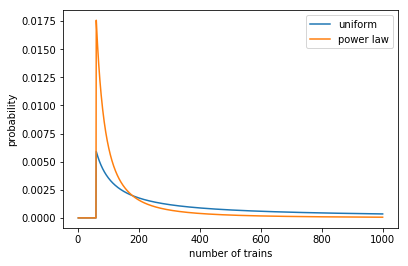

num= 1000 obs= [30, 60, 90]
uniform prior 164.30558642273346
credible interval (92, 373)
power law prior 133.27523137503107
credible interval (91, 242)


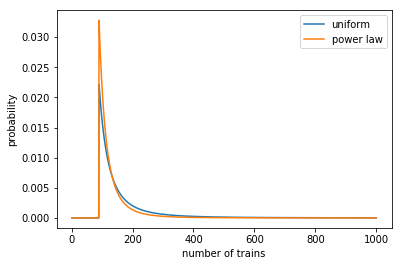

num= 500 obs= [30, 60, 90]
uniform prior 151.84958795903836
credible interval (92, 316)
power law prior 133.27523137503107
credible interval (91, 242)


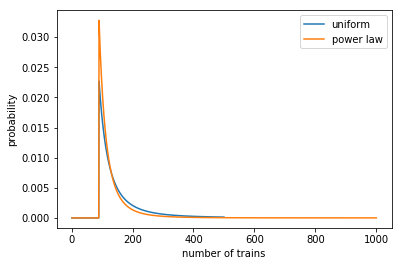

num= 2000 obs= [30, 60, 90]
uniform prior 171.3381810915096
credible interval (92, 393)
power law prior 133.27523137503107
credible interval (91, 242)


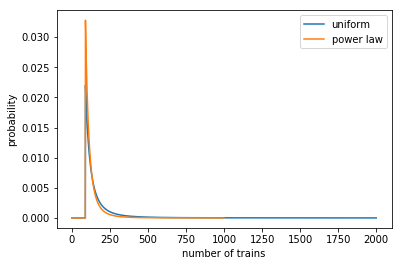

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np


class Pmf:
    
    def __init__(self,hypoth,prob):
        assert len(hypoth)==len(prob)
        self.n = len(prob)
        self.hypoth = np.array(hypoth)
        self.prob = np.array(prob)
        self.normalize()
        
    def normalize(self):
        t = self.prob.sum()
        assert t>0
        self.prob = self.prob/t
    
    def tell_distribution(self):
        return (self.hypoth,self.prob)
    
    def mean(self):
        return (self.hypoth*self.prob).sum()
    
    def percentile(self,percent):
        p = percent/100.0
        t = 0.0
        for i in range(self.n):
            t += self.prob[i]
            if t>=p:
                return self.hypoth[i]
        return None
    
    def credible_interval(self):
        return (self.percentile(5),self.percentile(95))
        
        
class UniformDist(Pmf):
    def __init__(self,n):
        Pmf.__init__(self,range(1,n+1),[1.0]*n)
        
class PowerLawDist(Pmf):
    def __init__(self,n,alpha=1.0):
        self.alpha = alpha
        h = range(1,n+1)
        p = [x**(-alpha) for x in h]
        Pmf.__init__(self,h,p)

class Bayes:
    
    def __init__(self,pmf):
        assert isinstance(pmf,Pmf)
        self.pmf = pmf
    
    def update(self,data):
        for i in range(self.pmf.n):
            like = self.likelihood(data,self.pmf.hypoth[i])
            self.pmf.prob[i] *= like
        return self.pmf.normalize()

    def likelihood(self,data,hypo):
        raise NotImplementedError()
        
class Train(Bayes):
    
    # inherit __init__
    
    def likelihood(self,data,hypo):
        if hypo<data:
            return 0.0
        else:
            return 1.0/hypo

def run_bayes(num,obs):
    
    print("num=",num,"obs=",obs)
    suite = Train(UniformDist(num))
    for o in obs:
        suite.update(o)
    print("uniform prior",suite.pmf.mean())
    print("credible interval",suite.pmf.credible_interval())
    (h,p)= suite.pmf.tell_distribution()
    plt.plot(h,p)

    suite = Train(PowerLawDist(1000))
    for o in obs:
        suite.update(o)
    print("power law prior", suite.pmf.mean())
    print("credible interval",suite.pmf.credible_interval())
    (h,p)= suite.pmf.tell_distribution()

    plt.plot(h,p)
    plt.xlabel("number of trains")
    plt.ylabel("probability")
    plt.legend(["uniform","power law"])

    plt.show()

run_bayes(1000,[60])
run_bayes(1000,[30,60,90])
run_bayes(500,[30,60,90])
run_bayes(2000,[30,60,90])
